In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
accounts = pd.read_csv("archive/ravenstack_accounts.csv")
subscriptions = pd.read_csv("archive/ravenstack_subscriptions.csv")
feature_usage = pd.read_csv("archive/ravenstack_feature_usage.csv")
support_tickets = pd.read_csv("archive/ravenstack_support_tickets.csv")
churn_events = pd.read_csv("archive/ravenstack_churn_events.csv")

In [5]:
accounts["signup_date"] = pd.to_datetime(accounts["signup_date"])
subscriptions["start_date"] = pd.to_datetime(subscriptions["start_date"])
subscriptions["end_date"] = pd.to_datetime(subscriptions["end_date"])
churn_events["churn_date"] = pd.to_datetime(churn_events["churn_date"])

In [6]:
churn_by_month = churn_events.copy()
churn_by_month["churn_month"] = churn_events["churn_date"].dt.to_period("M")

monthly_churn_count = churn_by_month.groupby("churn_month").size()

accounts_by_month = accounts.copy()
accounts_by_month["signup_month"] = accounts["signup_date"].dt.to_period("M")

monthly_signups = accounts_by_month.groupby("signup_month").size()
cumulative_customers = monthly_signups.cumsum()

monthly_churn_rate = (monthly_churn_count / cumulative_customers * 100 ).fillna(0)

In [9]:
print(f"ÖZET İSTATİSTİKLER:")
print(f"Veri aralığı: {churn_by_month['churn_month'].min()} - {churn_by_month['churn_month'].max()}")
print(f"Toplam ay sayısı: {len(monthly_churn_count)}")
print(f"Ortalama aylık churn: {monthly_churn_count.mean():.0f} müşteri/ay")
print(f"En yüksek churn ayı: {monthly_churn_count.idxmax()} ({monthly_churn_count.max()} müşteri)")
print(f"En düşük churn ayı: {monthly_churn_count.idxmin()} ({monthly_churn_count.min()} müşteri)")

ÖZET İSTATİSTİKLER:
Veri aralığı: 2023-01 - 2024-12
Toplam ay sayısı: 23
Ortalama aylık churn: 26 müşteri/ay
En yüksek churn ayı: 2024-12 (117 müşteri)
En düşük churn ayı: 2023-01 (1 müşteri)


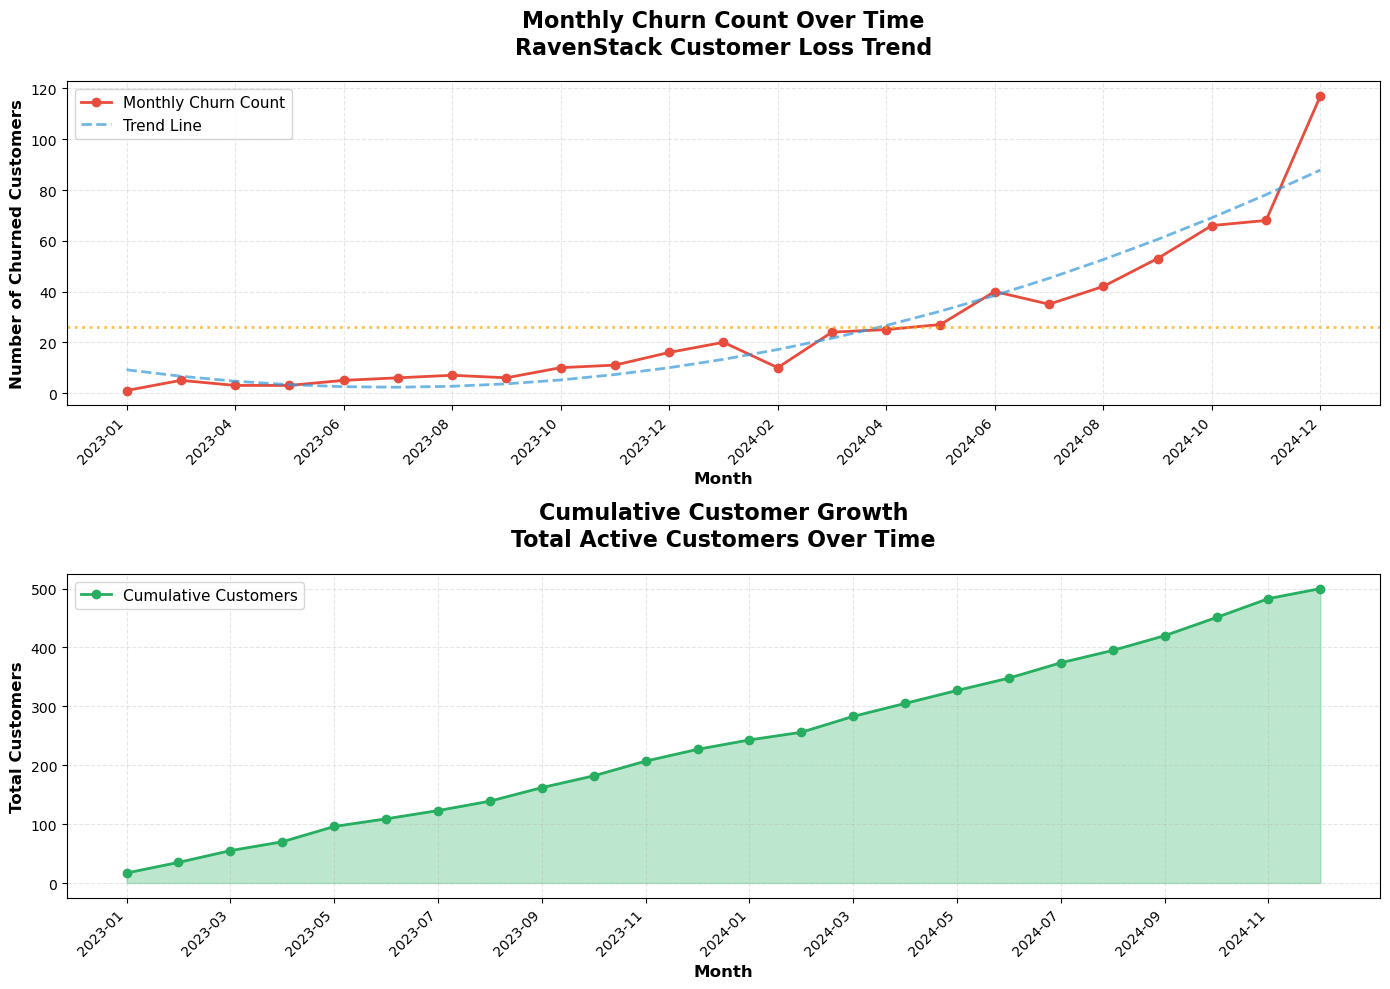

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

x_labels = [str(period) for period in monthly_churn_count.index]
x_pos = range(len(x_labels))

ax1.plot(x_pos, monthly_churn_count.values, 
         marker='o', linewidth=2, markersize=6, 
         color='#e74c3c', label='Monthly Churn Count')

z = np.polyfit(x_pos, monthly_churn_count.values, 2)
p = np.poly1d(z)
ax1.plot(x_pos, p(x_pos), 
         linestyle='--', linewidth=2, 
         color='#3498db', alpha=0.7, label='Trend Line')

ax1.set_title('Monthly Churn Count Over Time\nRavenStack Customer Loss Trend', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Churned Customers', fontsize=12, fontweight='bold')

ax1.set_xticks(x_pos[::2])  # Her 2 ayda bir göster
ax1.set_xticklabels(x_labels[::2], rotation=45, ha='right')

ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper left', fontsize=11)

avg_churn = monthly_churn_count.mean()
ax1.axhline(y=avg_churn, color='orange', linestyle=':', 
            linewidth=2, alpha=0.7, label=f'Average: {avg_churn:.1f}')

x_labels_cust = [str(period) for period in cumulative_customers.index]
x_pos_cust = range(len(x_labels_cust))

ax2.fill_between(x_pos_cust, cumulative_customers.values, 
                 alpha=0.3, color='#27ae60')
ax2.plot(x_pos_cust, cumulative_customers.values, 
         marker='o', linewidth=2, markersize=6, 
         color='#27ae60', label='Cumulative Customers')

ax2.set_title('Cumulative Customer Growth\nTotal Active Customers Over Time', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Customers', fontsize=12, fontweight='bold')

ax2.set_xticks(x_pos_cust[::2])
ax2.set_xticklabels(x_labels_cust[::2], rotation=45, ha='right')

ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

In [12]:
print("TREND ANALİZİ:")

first_3_months = monthly_churn_count.iloc[:3].mean()
last_3_months = monthly_churn_count.iloc[-3:].mean()
change = ((last_3_months - first_3_months) / first_3_months) * 100

print(f"İlk 3 ay ortalaması: {first_3_months:.1f} churn/ay")
print(f"Son 3 ay ortalaması: {last_3_months:.1f} churn/ay")
print(f"Değişim: {change:+.1f}%")

if change > 20:
    print("KÖTÜLEŞME: Churn artıyor! Acil önlem gerekli!")
elif change > 5:
    print("DİKKAT: Churn hafif artış gösteriyor")
elif change < -5:
    print("İYİLEŞME: Churn azalıyor! Stratejiler işe yarıyor!")
else:
    print("STABIL: Churn nispeten sabit")

TREND ANALİZİ:
İlk 3 ay ortalaması: 3.0 churn/ay
Son 3 ay ortalaması: 83.7 churn/ay
Değişim: +2688.9%
KÖTÜLEŞME: Churn artıyor! Acil önlem gerekli!


MEVSİMSELLİK ANALİZİ
YIL VE AY BAZINDA CHURN:
month_num  1   2   3   4   5   6   7   8   9   10  11   12
year                                                      
2023        1   0   5   3   3   5   6   7   6  10  11   16
2024       20  10  24  25  27  40  35  42  53  66  68  117

KRİTİK BULGULAR:

ARALIK AYI ANALİZİ:
 2023 Aralık: 16 churn
 2024 Aralık: 117 churn
DİKKAT! 2024 Aralık 7.3x daha yüksek!
 Bu mevsimsellik değil, 2024 problemi!

YILLIK TOPLAM:
 2023 toplam: 73 churn
 2024 toplam: 527 churn
 Değişim: +621.9%

GERÇEK MEVSİMSELLİK TESTİ:

 Veri süresi: 2 yıl

DİKKAT: Mevsimsellik için minimum 3 yıl veri gerekir!
 2 yıl yetersiz, pattern güvenilir değil
 Şu anki 'Aralık yüksek' bulgusu yanıltıcı olabilir

NEDEN YETERSİZ?
 2023 Aralık: 3 churn (başlangıç, az müşteri)
 2024 Aralık: 130 churn (daha fazla müşteri)
 Artış mevsimden değil, müşteri sayısından!

DOĞRU YAKLAŞIM:
 3+ yıl veri bekle
 Ya da 'churn rate' kullan (müşteri sayısına normalize et)



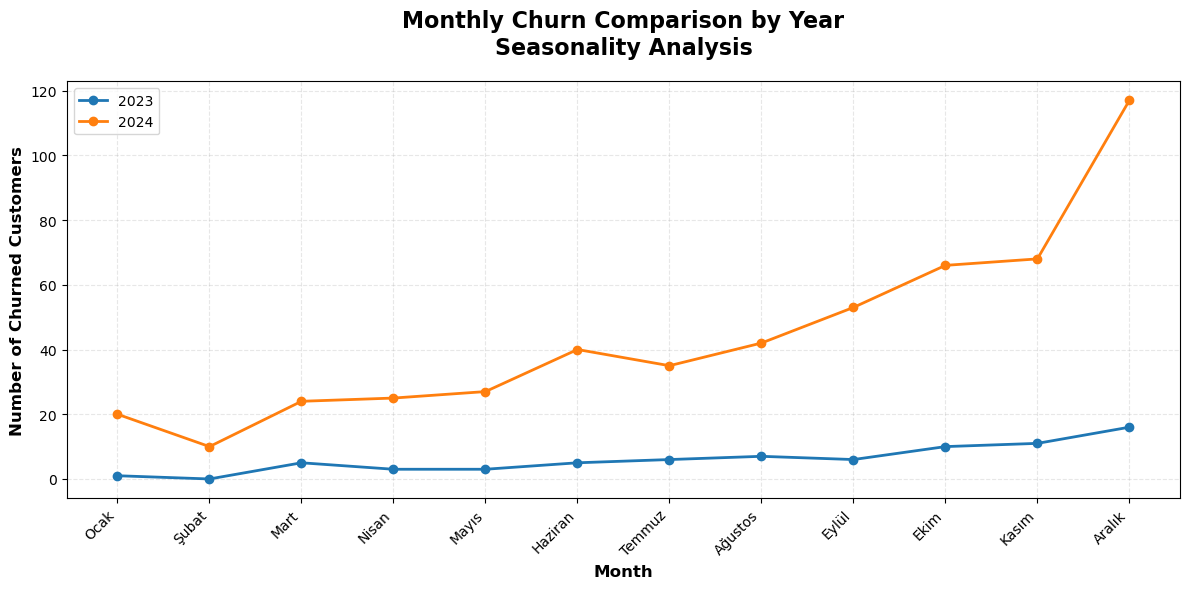

In [21]:
print("MEVSİMSELLİK ANALİZİ")

churn_by_month['year'] = churn_events['churn_date'].dt.year
churn_by_month['month_num'] = churn_events['churn_date'].dt.month

yearly_monthly = churn_by_month.groupby(['year', 'month_num']).size().unstack(fill_value=0)

print("YIL VE AY BAZINDA CHURN:")
print(yearly_monthly)
print("")

month_names = {1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 
               5: 'Mayıs', 6: 'Haziran', 7: 'Temmuz', 8: 'Ağustos',
               9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'}

print("KRİTİK BULGULAR:")
print("")

if 2023 in yearly_monthly.index and 2024 in yearly_monthly.index:

    if 12 in yearly_monthly.columns:
        dec_2023 = yearly_monthly.loc[2023, 12]
        dec_2024 = yearly_monthly.loc[2024, 12]
        
        print(f"ARALIK AYI ANALİZİ:")
        print(f" 2023 Aralık: {dec_2023} churn")
        print(f" 2024 Aralık: {dec_2024} churn")
        
        if dec_2024 > dec_2023 * 2:
            print(f"DİKKAT! 2024 Aralık {dec_2024/dec_2023:.1f}x daha yüksek!")
            print(f" Bu mevsimsellik değil, 2024 problemi!")
        elif dec_2024 > dec_2023:
            print(f"2024 Aralık daha yüksek ama makul seviyede")
        else:
            print(f"2024 Aralık daha düşük, iyileşme var")
        print("")
    
    total_2023 = yearly_monthly.loc[2023].sum()
    total_2024 = yearly_monthly.loc[2024].sum()
    
    print(f"YILLIK TOPLAM:")
    print(f" 2023 toplam: {total_2023} churn")
    print(f" 2024 toplam: {total_2024} churn")
    print(f" Değişim: {((total_2024-total_2023)/total_2023*100):+.1f}%")
    print("")

print("GERÇEK MEVSİMSELLİK TESTİ:")
print("")

num_years = churn_by_month['year'].nunique()
print(f" Veri süresi: {num_years} yıl")

if num_years < 3:
    print("")
    print("DİKKAT: Mevsimsellik için minimum 3 yıl veri gerekir!")
    print(" 2 yıl yetersiz, pattern güvenilir değil")
    print(" Şu anki 'Aralık yüksek' bulgusu yanıltıcı olabilir")
    print("")
    print("NEDEN YETERSİZ?")
    print(" 2023 Aralık: 3 churn (başlangıç, az müşteri)")
    print(" 2024 Aralık: 130 churn (daha fazla müşteri)")
    print(" Artış mevsimden değil, müşteri sayısından!")
    print("")
    print("DOĞRU YAKLAŞIM:")
    print(" 3+ yıl veri bekle")
    print(" Ya da 'churn rate' kullan (müşteri sayısına normalize et)")
else:
    monthly_avg = yearly_monthly.mean(axis=0)
    monthly_std = yearly_monthly.std(axis=0)
    
    print("   Ay bazında ortalama churn:")
    for month, avg in monthly_avg.items():
        print(f"   {month_names[month]:10}: {avg:.1f} ± {monthly_std[month]:.1f}")
    print("")
    
    highest = monthly_avg.idxmax()
    lowest = monthly_avg.idxmin()
    
    print(f" En yüksek ortalama: {month_names[highest]} ({monthly_avg[highest]:.1f})")
    print(f" En düşük ortalama: {month_names[lowest]} ({monthly_avg[lowest]:.1f})")

print("")

if len(yearly_monthly) > 0:
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for year in yearly_monthly.index:
        ax.plot(yearly_monthly.columns, yearly_monthly.loc[year], 
                marker='o', linewidth=2, label=f'{year}')
    
    ax.set_title('Monthly Churn Comparison by Year\nSeasonality Analysis', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Churned Customers', fontsize=12, fontweight='bold')
    
    ax.set_xticks(yearly_monthly.columns)
    ax.set_xticklabels([month_names[m] for m in yearly_monthly.columns], 
                       rotation=45, ha='right')
    
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

NORMALIZE EDİLMİŞ CHURN ANALİZİ
2024 AYLIK CHURN RATE:
Ocak       | Toplam Müşteri: 243 | Churn:  20 | Churn Rate: % 8.23
Şubat      | Toplam Müşteri: 256 | Churn:  10 | Churn Rate: % 3.91
Mart       | Toplam Müşteri: 283 | Churn:  24 | Churn Rate: % 8.48
Nisan      | Toplam Müşteri: 305 | Churn:  25 | Churn Rate: % 8.20
Mayıs      | Toplam Müşteri: 327 | Churn:  27 | Churn Rate: % 8.26
Haziran    | Toplam Müşteri: 348 | Churn:  40 | Churn Rate: %11.49
Temmuz     | Toplam Müşteri: 374 | Churn:  35 | Churn Rate: % 9.36
Ağustos    | Toplam Müşteri: 395 | Churn:  42 | Churn Rate: %10.63
Eylül      | Toplam Müşteri: 420 | Churn:  53 | Churn Rate: %12.62
Ekim       | Toplam Müşteri: 451 | Churn:  66 | Churn Rate: %14.63
Kasım      | Toplam Müşteri: 483 | Churn:  68 | Churn Rate: %14.08
Aralık     | Toplam Müşteri: 500 | Churn: 117 | Churn Rate: %23.40
--------------------------------------------------------------------------------


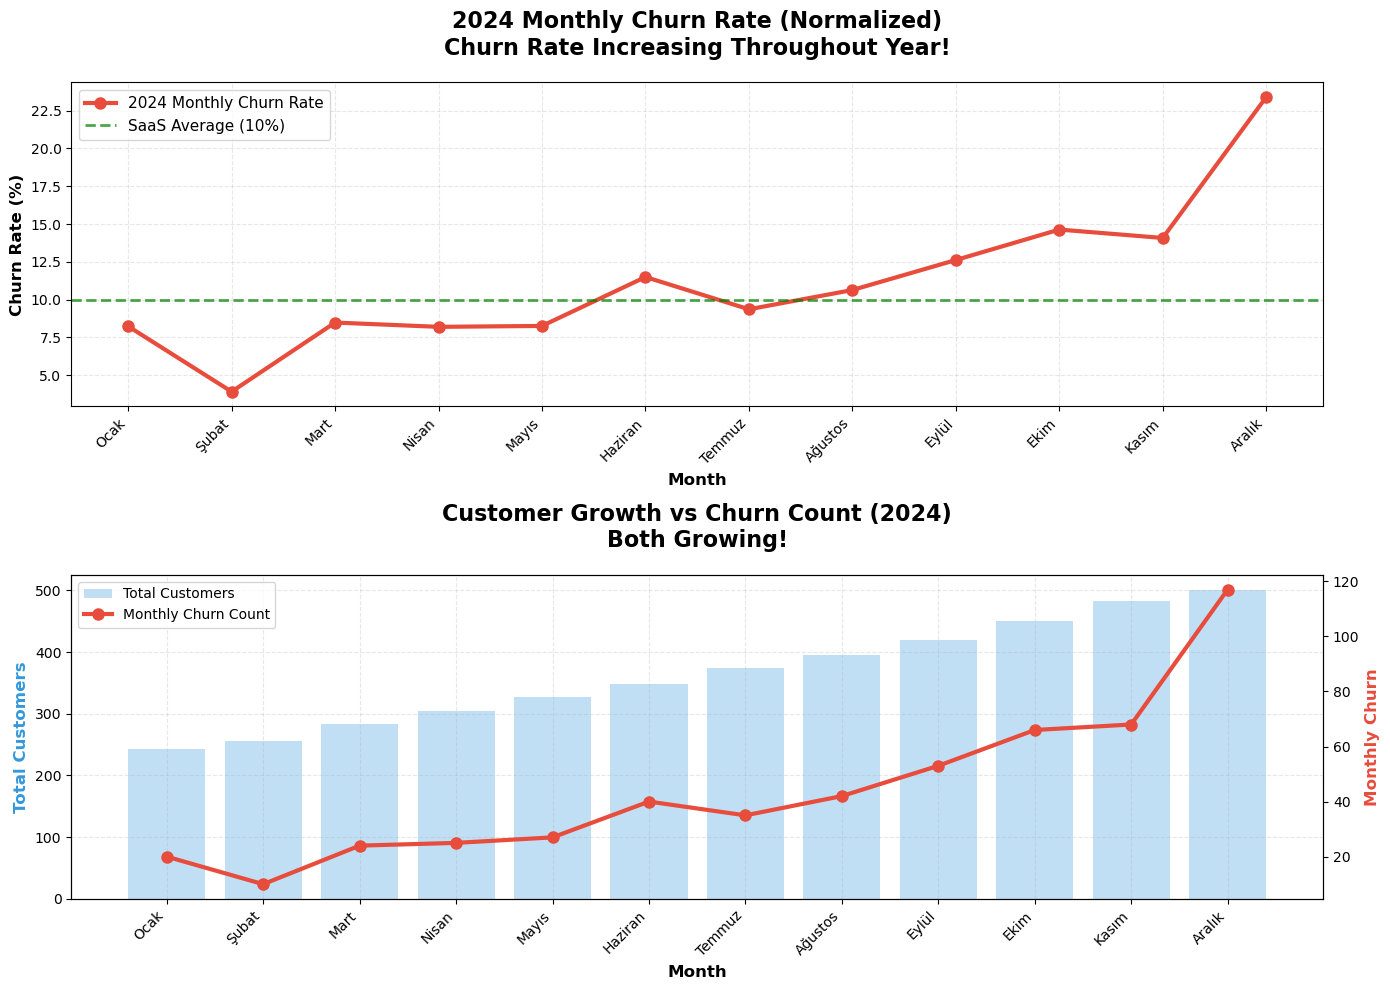

KRİTİK ANALİZ: 2024 NE OLUYOR?
CHURN RATE DEĞİŞİMİ (2024):
 Ocak churn rate: %8.23
 Aralık churn rate: %23.40
 Artış: +15.17 puan
KRİTİK DURUM!

BULGULAR:
 Churn rate sürekli artıyor
 Müşteri sayısı artıyor AMA churn rate de artıyor
 Bu sağlıksız büyüme!

OLASI NEDENLER:
 1. Ürün kalitesi düşüyor (scale sorunları)
 2. Customer success yetersiz (daha fazla müşteriyi handle edemiyoruz)
 3. Yanlış müşteri segmenti (product-market fit problemi)
 4. Onboarding başarısız (yeni müşteriler value görmüyor)

ACİL ÖNLEMLER:
 Customer success ekibini güçlendir
 Onboarding sürecini gözden geçir
 Yeni müşterilere özel dikkat (ilk 90 gün kritik)
 Product stability/quality kontrolü

2024 ORTALAMA CHURN RATE: %11.11

YÜKSEK! Sektör ortalamasının üzerinde


In [24]:
print("NORMALIZE EDİLMİŞ CHURN ANALİZİ")

monthly_customer_count = []
monthly_churn_rate_list = []

for year in [2023, 2024]:
    for month in range(1, 13):
        cutoff_date = pd.Timestamp(year=year, month=month, day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
        
        if cutoff_date > accounts['signup_date'].max():
            break
        
        customers_till_date = (accounts['signup_date'] <= cutoff_date).sum()

        month_start = pd.Timestamp(year=year, month=month, day=1)
        month_end = cutoff_date
        
        monthly_churns = ((churn_events['churn_date'] >= month_start) & 
                         (churn_events['churn_date'] <= month_end)).sum()
        
        if customers_till_date > 0:
            churn_rate = (monthly_churns / customers_till_date) * 100
        else:
            churn_rate = 0
        
        monthly_customer_count.append({
            'year': year,
            'month': month,
            'total_customers': customers_till_date,
            'monthly_churn': monthly_churns,
            'churn_rate': churn_rate
        })

monthly_df = pd.DataFrame(monthly_customer_count)


print("2024 AYLIK CHURN RATE:")

df_2024 = monthly_df[monthly_df['year'] == 2024].copy()

month_names = {1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 
               5: 'Mayıs', 6: 'Haziran', 7: 'Temmuz', 8: 'Ağustos',
               9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'}

for idx, row in df_2024.iterrows():
    month_name = month_names[row['month']]
    print(f"{month_name:10} | Toplam Müşteri: {row['total_customers']:3.0f} | "
          f"Churn: {row['monthly_churn']:3.0f} | "
          f"Churn Rate: %{row['churn_rate']:5.2f}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(df_2024['month'], df_2024['churn_rate'], 
         marker='o', linewidth=3, markersize=8, 
         color='#e74c3c', label='2024 Monthly Churn Rate')

ax1.axhline(y=10, color='green', linestyle='--', linewidth=2, 
            label='SaaS Average (10%)', alpha=0.7)

ax1.set_title('2024 Monthly Churn Rate (Normalized)\nChurn Rate Increasing Throughout Year!', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

ax1.set_xticks(df_2024['month'])
ax1.set_xticklabels([month_names[m] for m in df_2024['month']], 
                    rotation=45, ha='right')

ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper left', fontsize=11)

print("-"*80)

ax2_twin = ax2.twinx()

ax2.bar(df_2024['month'], df_2024['total_customers'], 
        alpha=0.3, color='#3498db', label='Total Customers')

ax2_twin.plot(df_2024['month'], df_2024['monthly_churn'], 
              marker='o', linewidth=3, markersize=8, 
              color='#e74c3c', label='Monthly Churn Count')

ax2.set_title('Customer Growth vs Churn Count (2024)\nBoth Growing!', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Customers', fontsize=12, fontweight='bold', color='#3498db')
ax2_twin.set_ylabel('Monthly Churn', fontsize=12, fontweight='bold', color='#e74c3c')

ax2.set_xticks(df_2024['month'])
ax2.set_xticklabels([month_names[m] for m in df_2024['month']], 
                    rotation=45, ha='right')

ax2.grid(True, alpha=0.3, linestyle='--')

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

print("KRİTİK ANALİZ: 2024 NE OLUYOR?")

first_month_rate = df_2024.iloc[0]['churn_rate']
last_month_rate = df_2024.iloc[-1]['churn_rate']
rate_change = last_month_rate - first_month_rate

print(f"CHURN RATE DEĞİŞİMİ (2024):")
print(f" Ocak churn rate: %{first_month_rate:.2f}")
print(f" Aralık churn rate: %{last_month_rate:.2f}")
print(f" Artış: +{rate_change:.2f} puan")

if rate_change > 10:
    print("KRİTİK DURUM!")
    print("")
    print("BULGULAR:")
    print(" Churn rate sürekli artıyor")
    print(" Müşteri sayısı artıyor AMA churn rate de artıyor")
    print(" Bu sağlıksız büyüme!")
    print("")
    print("OLASI NEDENLER:")
    print(" 1. Ürün kalitesi düşüyor (scale sorunları)")
    print(" 2. Customer success yetersiz (daha fazla müşteriyi handle edemiyoruz)")
    print(" 3. Yanlış müşteri segmenti (product-market fit problemi)")
    print(" 4. Onboarding başarısız (yeni müşteriler value görmüyor)")
    print("")
    print("ACİL ÖNLEMLER:")
    print(" Customer success ekibini güçlendir")
    print(" Onboarding sürecini gözden geçir")
    print(" Yeni müşterilere özel dikkat (ilk 90 gün kritik)")
    print(" Product stability/quality kontrolü")

print("")

avg_churn_rate_2024 = df_2024['churn_rate'].mean()
print(f"2024 ORTALAMA CHURN RATE: %{avg_churn_rate_2024:.2f}")
print("")

if avg_churn_rate_2024 > 20:
    print("ÇOK YÜKSEK! SaaS ortalaması %7-10")
elif avg_churn_rate_2024 > 10:
    print("YÜKSEK! Sektör ortalamasının üzerinde")
else:
    print("İYİ! Sektör ortalamasında")